In [64]:
import text_transformer as tt
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
from ipywidgets import widgets
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np


remove_tokens = ["’", "‘", "would", "said", "also", "“", "”", "–"]
filter_words = ["Brexit"]
%time articles, tokenzied = tt.preprocessing(directory="articles", verbose= True, remove_words=remove_tokens, filter_words=filter_words)
sia = SentimentIntensityAnalyzer()
articles_df = pd.DataFrame.from_dict(articles)
articles_df = articles_df.merge(articles_df.text.apply(lambda article: pd.Series(sia.polarity_scores(article))), 
    left_index=True, right_index=True)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


We're at 0.0% of the data.
We're at 6.12% of the data.
We're at 12.25% of the data.
We're at 18.37% of the data.
We're at 24.49% of the data.
We're at 30.62% of the data.
We're at 36.74% of the data.
We're at 42.86% of the data.
We're at 48.99% of the data.
We're at 55.11% of the data.
We're at 61.23% of the data.
We're at 67.36% of the data.
We're at 73.48% of the data.
We're at 79.6% of the data.
We're at 85.73% of the data.
We're at 91.85% of the data.
We're at 97.97% of the data.
Articles used: 4.24 %
Articles used: 693/16331
*********************************************
3117  ( 19.09 %) Articles were filtered out because of length and language
12521  ( 76.67 %) Articles were filtered out because of the filter words.
CPU times: user 1min 12s, sys: 16.5 s, total: 1min 28s
Wall time: 1min 35s


In [67]:
articles_df.newspaper.unique()

array(['dailymail', 'thetimes', 'theguardian', 'reuters', 'ft', 'euronews',
       'yahoo', 'wsj', 'breitbart', 'foxnews', 'aljazeera', 'nytimes',
       'cbc', 'nbcnews', 'latimes', 'go', 'huffpost'], dtype=object)

In [95]:
colors = {
    'dailymail': "#004db3",
    'thetimes': '#333333',
    'theguardian': '#052962',
    'reuters': '#ff8000',
    'ft': '#fff1e5',
    'euronews':'#003865',
    'yahoo': '#400090',
    'wsj': '#333333',
    'breitbart': '#ff550f',
    'foxnews': '#c20017',
    'aljazeera': '#fa9000',
    'nytimes': '#333333',
    'cbc': '#e60505',
    'nbcnews': '#102039',
    'latimes': '#333333',
    'go': '#ffffff',
    'huffpost': '#0DBE98'
}

In [103]:
%matplotlib notebook

# Axis to be ploted, possible options neg, pos, neu and compound
y_axis="pos"
x_axis="neg"

# Pre calculate the regressions for each newspaper
regressions = {newspaper: {} for newspaper in articles_df.newspaper.unique()}
reg = LinearRegression()
for newspaper in articles_df.newspaper.unique():
    reg_articles = articles_df[articles_df.newspaper.isin([newspaper])]
    reg.fit(reg_articles[x_axis].values.reshape(-1, 1) , reg_articles[y_axis])
    regressions[newspaper]["coef"] = reg.coef_
    regressions[newspaper]["intercept"] = reg.intercept_ 

#https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept-in-matplotlib
# Ploting a regression line in matplotlib is strangly hard
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    ax = plt.gca()
    x_vals = np.array(ax.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', color=colors[drop_newspapers.value])

def action(words):
    plt.cla()
    ax=plt.gca()
    ax.set_xlim([-0.025,0.4])
    ax.set_ylim([-0.025,0.3])
    plot_alpha = 0.2
    selected_plot_alpha = 0.8
    centroid_alpha = 0.85
    selected_centroid_alpha = 1

    #Plot the centroids for all newspapers and lower transparency in the scatter
    if centroid.value:
        centers = articles_df.groupby("newspaper").mean().reset_index()
        sns.scatterplot(data=centers[~centers.newspaper.isin([drop_newspapers.value])],
                        y=y_axis, x=x_axis, hue="newspaper", label="Other newspapers", 
                        s=200, alpha=centroid_alpha, palette=colors , ax=ax)
        sns.scatterplot(data=centers[centers.newspaper.isin([drop_newspapers.value])], 
                        y=y_axis, x=x_axis, hue="newspaper", label="Selected Newspaper" 
                        ,alpha=selected_centroid_alpha, s=200, palette=colors , ax=ax)
        plot_alpha = 0.025
        selected_plot_alpha = 0.15

    #Plot pre computed regression for selected newspaper
    if regression.value and drop_newspapers.value != "":
        abline(regressions[drop_newspapers.value]["coef"], regressions[drop_newspapers.value]["intercept"])
    
    #Plot the scatter plot
    sns.scatterplot(data=articles_df[~articles_df.newspaper.isin([drop_newspapers.value])],
                    y=y_axis, x=x_axis, hue="newspaper", label="Other newspapers", 
                    s=100, alpha=plot_alpha, palette=colors , ax=ax)
    sns.scatterplot(data=articles_df[articles_df.newspaper.isin([drop_newspapers.value])], 
                    y=y_axis, x=x_axis, hue="newspaper", label="Selected Newspaper" ,
                    s=100,alpha=selected_plot_alpha, palette=colors , ax=ax)
    
    
#Ipython UI components
drop_words = widgets.Dropdown(
    options=["trump","brexit", "muller"],
    description='Word:'
)
drop_topics = widgets.Dropdown(
    options=["topic1","topic2", "topic3"],
    description='Topics:'
)
drop_newspapers = widgets.Dropdown(
    options=np.append(articles_df.newspaper.unique(), [""]),
    description='Newspaper:',
    value=""
)
regression = widgets.Checkbox(False, description='Regression')
centroid = widgets.Checkbox(False, description='Centroid')



# Add actions to Ipython components
regression.observe(action)
centroid.observe(action)
drop_newspapers.observe(action)

# Display them after the plot
items_lda = widgets.Box([item for item in [drop_words, drop_topics]])
# Display them after the plot
items_sentiment = widgets.Box([item for item in [drop_newspapers, regression, centroid]])



Box(children=(Dropdown(description='Word:', options=('trump', 'brexit', 'muller'), value='trump'), Dropdown(de…

Box(children=(Dropdown(description='Newspaper:', index=17, options=('dailymail', 'thetimes', 'theguardian', 'r…

<IPython.core.display.Javascript object>


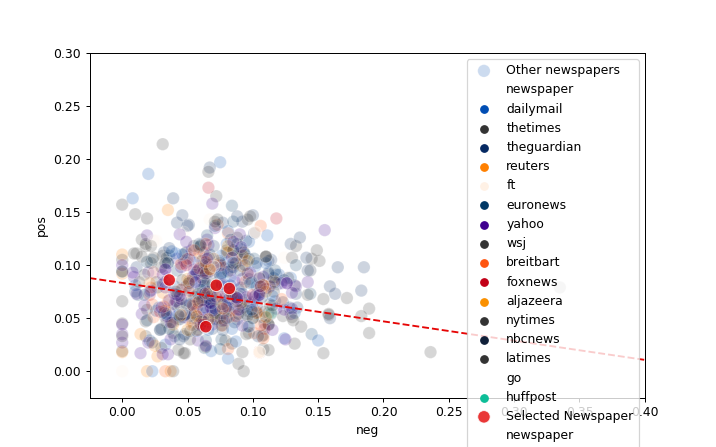

In [104]:
display(items_lda)
display(items_sentiment)
#Plot size
plt.figure("Pos/Neg Plot",figsize=(8,5),edgecolor="b",facecolor="b",frameon=False)
# Plot the inital plot
action(drop.value)